### Import Packages and Fetch Data

In [115]:
# Setup
import numpy as np
import pandas as pd
import os
import tarfile
import csv

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/after_preprocessing_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Alzheimers Dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ashleythorlin/Risk-Prediction-For-Alzheimers/main/"
ALZHEIMERS_PATH = "dataset"
ALZHEIMERS_URL = DOWNLOAD_ROOT + "dataset/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv?token=GHSAT0AAAAAACALXBOZACPGSM5KBYSQMM26ZA72J7A"

def fetch_alzheimers_data(alzheimers_url=ALZHEIMERS_URL, alzheimers_path=ALZHEIMERS_PATH):
    tgz_path = os.path.join(alzheimers_path, "Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")
    alzheimers_tgz = tarfile.open(tgz_path)
    alzheimers_tgz.extractall(path=alzheimers_path)
    alzheimers_tgz.close()
    
def load_alzheimers_data(alzheimers_path=ALZHEIMERS_PATH):
    csv_path = os.path.join(alzheimers_path, "Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")
    return pd.read_csv(csv_path)


In [116]:
alzheimers = load_alzheimers_data()

/var/folders/93/wvjyds_n62x_cn34lfc_6f080000gn/T/ipykernel_2159/3787160497.py:41: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_path)


In [117]:
alzheimers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       0 non-null       float64
 1   YearStart                   214462 non-null  int64  
 2   YearEnd                     214462 non-null  int64  
 3   LocationAbbr                214462 non-null  object 
 4   LocationDesc                214462 non-null  object 
 5   Datasource                  214462 non-null  object 
 6   Class                       214462 non-null  object 
 7   Topic                       214462 non-null  object 
 8   Question                    214462 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             214462 non-null  object 
 11  DataValueTypeID             214462 non-null  object 
 12  Data_Value_Type             214462 non-null  object 
 13  Data_Value    

In [118]:
alzheimers.describe()

,RowId,YearStart,YearEnd,Response,Data_Value,Data_Value_Alt,Sample_Size,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID3,StratificationID3,Report
count,0.0,214462.000000,214462.000000,0.0,144629.000000,144629.000000,0.0,0.0,0.0,0.0,214462.000000,0.0,0.0,0.0
mean,NaN,2017.378477,2017.634000,NaN,37.341956,37.341956,NaN,NaN,NaN,NaN,800.987821,NaN,NaN,NaN
std,NaN,1.779822,1.778926,NaN,25.183017,25.183017,NaN,NaN,NaN,NaN,2512.934094,NaN,NaN,NaN
min,NaN,2015.000000,2015.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,2016.000000,2016.000000,NaN,15.300000,15.300000,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN
50%,NaN,2017.000000,2018.000000,NaN,32.500000,32.500000,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN
75%,NaN,2019.000000,2019.000000,NaN,56.800000,56.800000,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN
max,NaN,2020.000000,2020.000000,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,9004.000000,NaN,NaN,NaN


### Visualizing the Data

Saving figure attribute_histogram_plots_before_preprocessing


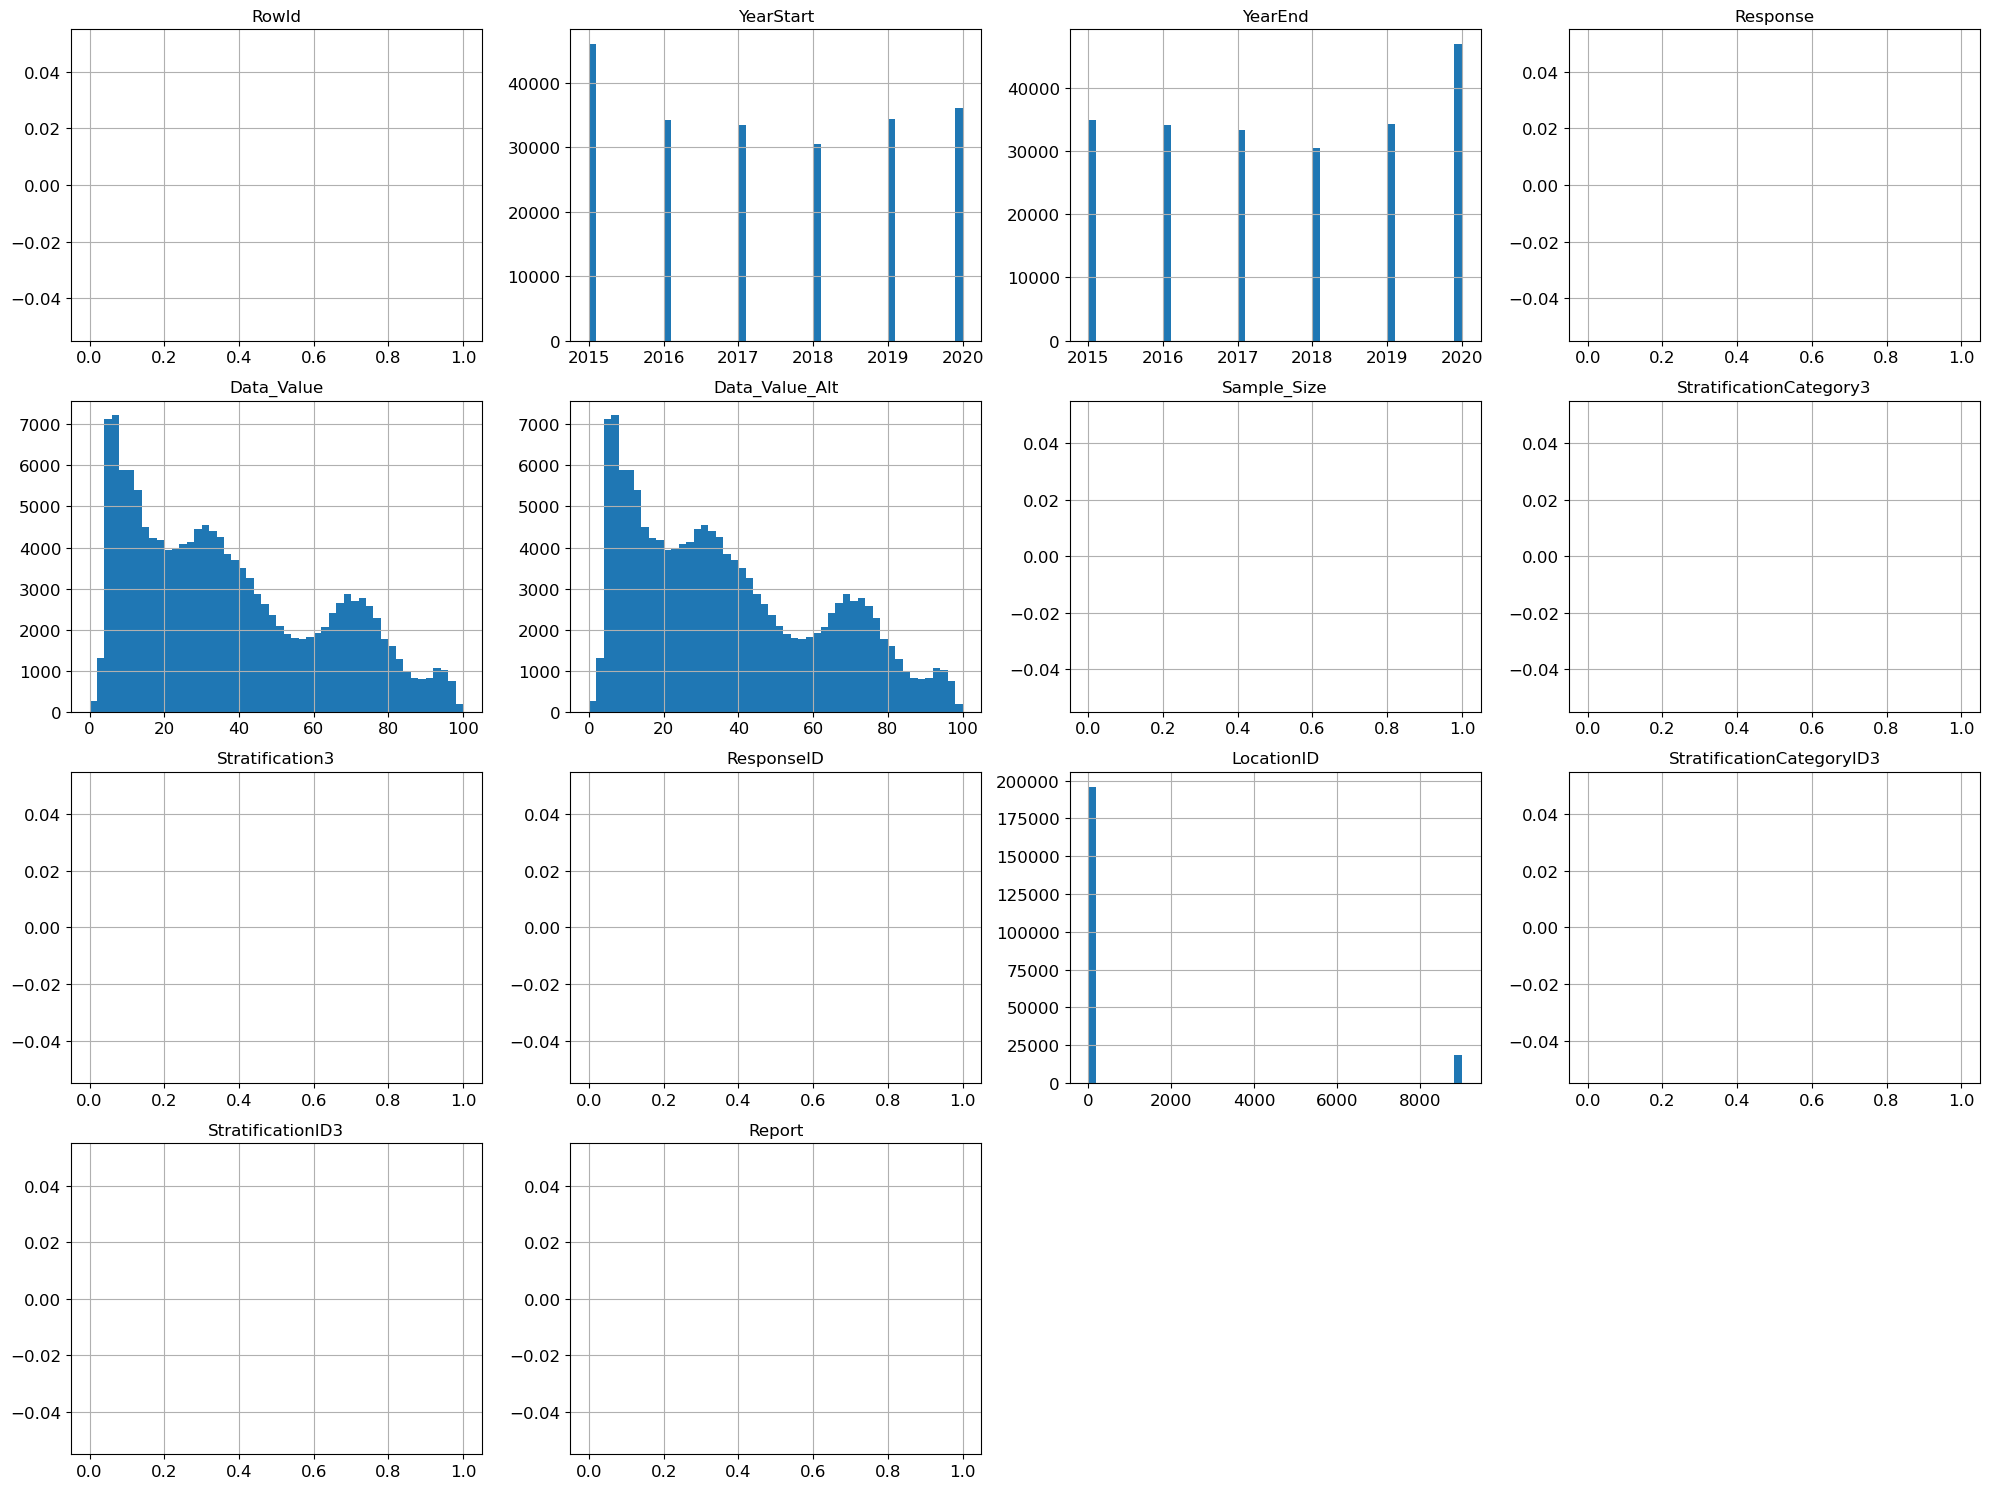

In [119]:
alzheimers.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_before_preprocessing")
plt.show()

### Experimenting with Attribute Combinations

### Data Cleaning

We are deleting the following columns due to them being empty or irrelevant:

RowID, LocationAbbr, Datasource, Response, Data_Value_Unit, DataValueTypeID, Sample_Size, Geolocation, ClassID, TopicID, QuestionID, ResponseID, LocationID, StratificationID1, StratificationCategory2, Stratification2, Stratification3, StratificationCategoryID3 StratificationID3

In [120]:
columns_drop = [
    'RowId', 'LocationAbbr', 'Datasource', 'Response', 'Data_Value_Unit', 
    'DataValueTypeID', 'Sample_Size', 'Geolocation', 'ClassID', 'TopicID',
    'QuestionID', 'ResponseID', 'LocationID', 'StratificationID1', 
    'StratificationCategory2', 'Stratification2', 'Stratification3', 
    'StratificationCategoryID3', 'StratificationID3', 'Report', 'Question',
    'Data_Value_Alt', 'StratificationCategory3','StratificationCategoryID1', 'StratificationCategory1'
    ]
# change the column Stratification1 to Age group & drop the columns that are not needed
alzheimers_clean = alzheimers.drop(labels=columns_drop, axis=1).rename(columns={'Stratification1': 'AgeGroup'})
alzheimers_clean.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,AgeGroup,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage,26.3,NaN,NaN,23.9,29.0,50-64 years,OVERALL,OVERALL
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage,24.0,NaN,NaN,21.2,27.0,50-64 years,OVERALL,OVERALL
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage,35.7,NaN,NaN,32.5,39.1,50-64 years,OVERALL,OVERALL
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Mean,4.8,NaN,NaN,4.0,5.5,50-64 years,OVERALL,OVERALL
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage,13.7,NaN,NaN,12.1,15.4,Overall,GENDER,MALE


Separating Dataset into Different Dataframes Based on Class (Overall Health, Mental Health, etc.)

In [121]:
# Retrieve unique values from Class
class_names = alzheimers_clean["Class"].unique()

# Create dataframes for each class
overall_health = alzheimers_clean[alzheimers_clean['Class'] == 'Overall Health'].drop(labels='Class', axis=1)
mental_health = alzheimers_clean[alzheimers_clean['Class'] == 'Mental Health'].drop(labels='Class', axis=1)
smoking_alcohol = alzheimers_clean[alzheimers_clean['Class'] == 'Smoking and Alcohol Use'].drop(labels='Class', axis=1)
screenings_vaccines = alzheimers_clean[alzheimers_clean['Class'] == 'Screenings and Vaccines'].drop(labels='Class', axis=1)
nutrition = alzheimers_clean[alzheimers_clean['Class'] == 'Nutrition/Physical Activity/Obesity'].drop(labels='Class', axis=1)
caregiving = alzheimers_clean[alzheimers_clean['Class'] == 'Caregiving'].drop(labels='Class', axis=1)
cognitive_decline = alzheimers_clean[alzheimers_clean['Class'] == 'Cognitive Decline'].drop(labels='Class', axis=1)


overall_health.head()

,YearStart,YearEnd,LocationDesc,Topic,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,AgeGroup,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Arthritis among older adults,Percentage,26.3,NaN,NaN,23.9,29.0,50-64 years,OVERALL,OVERALL
2,2017,2017,Idaho,Arthritis among older adults,Percentage,35.7,NaN,NaN,32.5,39.1,50-64 years,OVERALL,OVERALL
3,2018,2018,Idaho,Physically unhealthy days (mean number of days),Mean,4.8,NaN,NaN,4.0,5.5,50-64 years,OVERALL,OVERALL
5,2020,2020,Iowa,Prevalence of sufficient sleep,Percentage,73.5,NaN,NaN,72.1,74.8,Overall,OVERALL,OVERALL
6,2020,2020,Iowa,Fair or poor health among older adults with ar...,Percentage,26.1,NaN,NaN,24.0,28.3,Overall,OVERALL,OVERALL


Saving figure attribute_histogram_plots_after_pivot


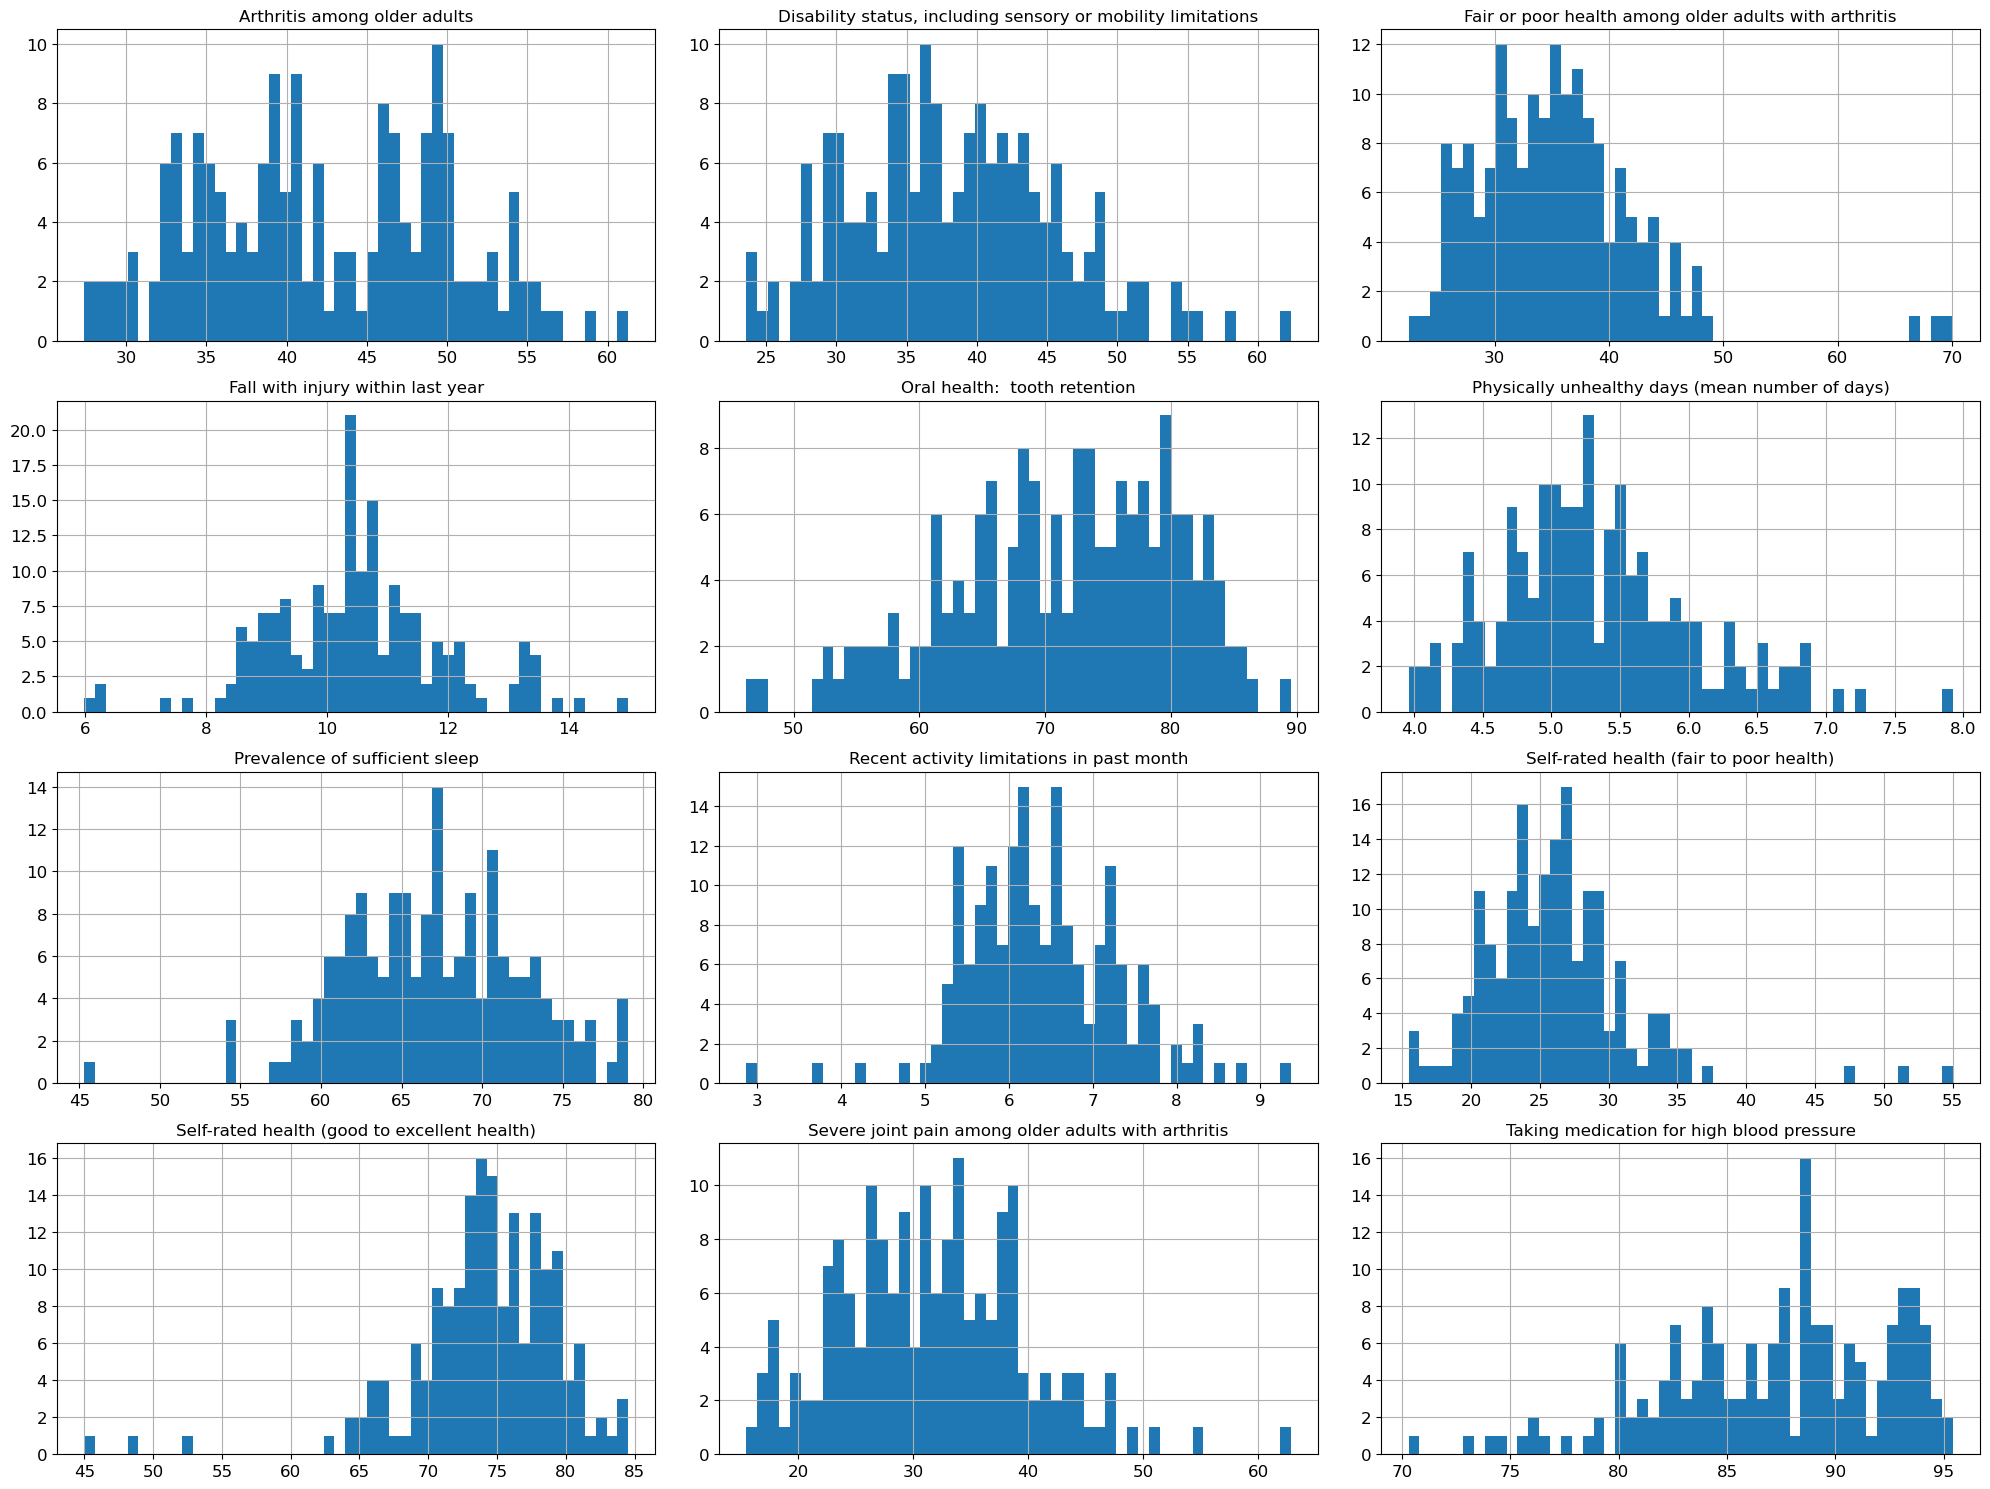

Topic,LocationDesc,AgeGroup,Arthritis among older adults,"Disability status, including sensory or mobility limitations",Fair or poor health among older adults with arthritis,Fall with injury within last year,Oral health: tooth retention,Physically unhealthy days (mean number of days),Prevalence of sufficient sleep,Recent activity limitations in past month,Self-rated health (fair to poor health),Self-rated health (good to excellent health),Severe joint pain among older adults with arthritis,Taking medication for high blood pressure
0,Alabama,50-64 years,46.670000,41.500000,43.045000,12.160000,68.626667,6.200000,59.500000,8.183333,29.683333,70.316667,47.006667,87.880000
1,Alabama,65 years or older,58.890000,49.064000,42.130000,9.773333,53.793333,6.153333,70.540000,6.740000,33.706667,66.293333,34.066667,94.186667
2,Alabama,Overall,53.886957,46.840741,42.450000,11.100000,62.233333,6.575758,64.460000,7.566667,32.912121,67.087879,40.613333,90.973333
3,Alaska,50-64 years,32.140000,27.600000,30.965000,14.235714,79.520000,4.943333,65.466667,5.731034,19.176667,80.823333,26.230000,70.314286
4,Alaska,65 years or older,49.540000,43.600000,29.872222,12.036364,65.786667,5.170000,73.660000,5.803704,23.253333,76.746667,20.300000,83.264286


In [122]:
alzheimers_dfs = [overall_health, mental_health, smoking_alcohol, screenings_vaccines, nutrition, caregiving, cognitive_decline] 
for i in range(len(alzheimers_dfs)):
    alzheimers_dfs[i] = pd.pivot_table(alzheimers_dfs[i], 
                        values='Data_Value', 
                        index=['LocationDesc','AgeGroup'],
                        columns='Topic',)
    alzheimers_dfs[i] = alzheimers_dfs[i].reset_index()
# plot the data
alzheimers_dfs[0].hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_after_pivot")
plt.show()
alzheimers_dfs[0].head()

### Identifying Correlations

Saving figure correlation_matrix


/var/folders/93/wvjyds_n62x_cn34lfc_6f080000gn/T/ipykernel_2159/3787160497.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


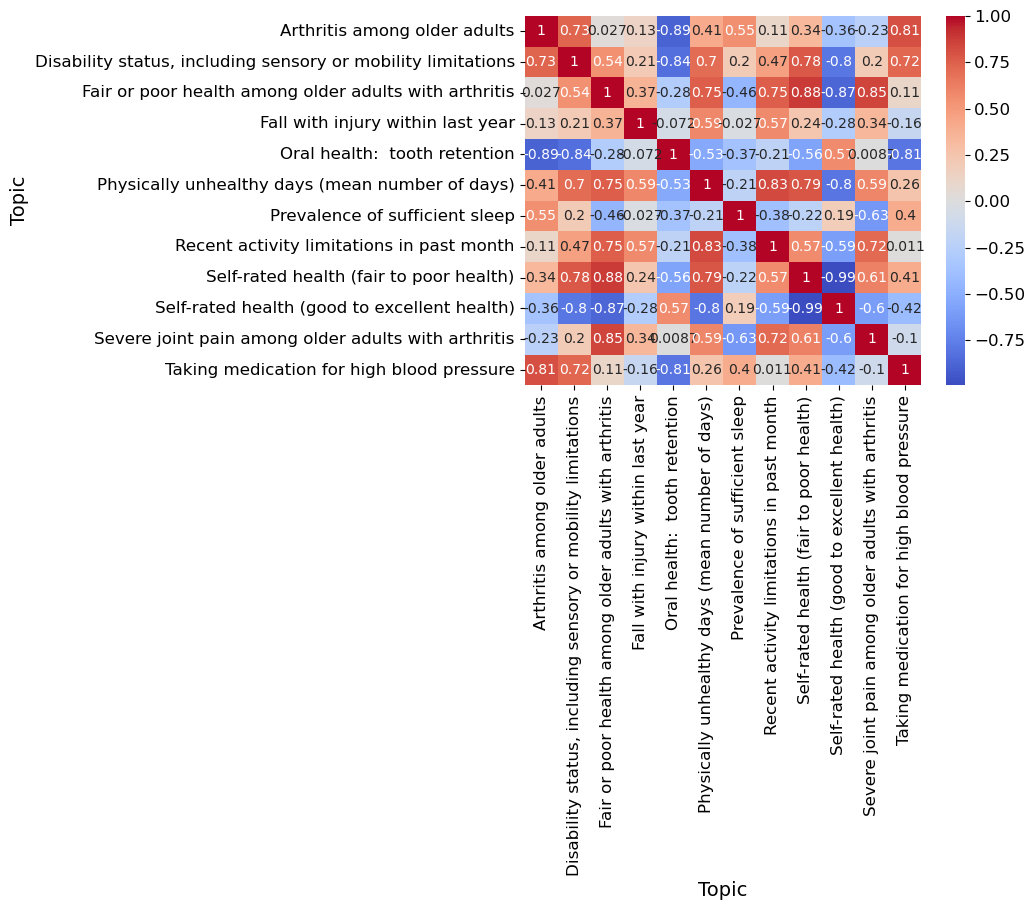

In [123]:
# print correlation matrix for each dataframe
corr_matrices = []
for i in range(len(alzheimers_dfs)):
    corr = alzheimers_dfs[i].iloc[:, 2:].corr('pearson')
    corr_matrices.append(corr)
corr_matrices[0]

# graph the correlation matrix
import seaborn as sns
sns.heatmap(corr_matrices[0], annot=True, cmap='coolwarm')
save_fig("correlation_matrix")
plt.show()

### Handling Text and Categorical Attributes

To handle the attribute AgeGroup, we used an `OrdinalEncoder` to encode our categorical values as numerical. We opted for an OrdinalEncoder since the AgeGroup attribute is ordinal (50-64, 65+, 50+/Overall) and categorical.

In [128]:
# Ordinal Encoding Age Group Attributes:
# 50-64
# 65+
# 50+ (overall)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

encoded_agegroup  = []
for i in range(len(alzheimers_dfs)):
    age_group = alzheimers_dfs[i].loc[:, ['AgeGroup']]
    age_group_enc = enc.fit_transform(age_group)
    encoded_agegroup.append(age_group_enc)

encoded_agegroup[0][:10]

# update AgeGroup values with encoded age group values
for i in range(len(alzheimers_dfs)):
    alzheimers_dfs[i].loc[:, ['AgeGroup']] = encoded_agegroup[i]

alzheimers_dfs[0].head()

Topic,LocationDesc,AgeGroup,Arthritis among older adults,"Disability status, including sensory or mobility limitations",Fair or poor health among older adults with arthritis,Fall with injury within last year,Oral health: tooth retention,Physically unhealthy days (mean number of days),Prevalence of sufficient sleep,Recent activity limitations in past month,Self-rated health (fair to poor health),Self-rated health (good to excellent health),Severe joint pain among older adults with arthritis,Taking medication for high blood pressure
0,Alabama,0.0,46.670000,41.500000,43.045000,12.160000,68.626667,6.200000,59.500000,8.183333,29.683333,70.316667,47.006667,87.880000
1,Alabama,1.0,58.890000,49.064000,42.130000,9.773333,53.793333,6.153333,70.540000,6.740000,33.706667,66.293333,34.066667,94.186667
2,Alabama,2.0,53.886957,46.840741,42.450000,11.100000,62.233333,6.575758,64.460000,7.566667,32.912121,67.087879,40.613333,90.973333
3,Alaska,0.0,32.140000,27.600000,30.965000,14.235714,79.520000,4.943333,65.466667,5.731034,19.176667,80.823333,26.230000,70.314286
4,Alaska,1.0,49.540000,43.600000,29.872222,12.036364,65.786667,5.170000,73.660000,5.803704,23.253333,76.746667,20.300000,83.264286


### Handling Missing Values & Outliers

```python
alzheimers_dfs.dropna(subset=["Data_Value"])    # option 1: drop rows with NaNs
alzheimers_dfs.drop("Data_Value", axis=1)       # option 2: drop columns with NaNs
median = alzheimers_dfs["Data_Value"].median()  # option 3: replace NaN values with the median
alzheimers_dfs["Data_Value"].fillna(mean, inplace=True) # option 4: replace NaN values with the mean
alzheimers_dfs["Data_Value"].fillna(-1, inplace=True) # option 5: replace NaN values with  -1
```
*Note: when Data_Value = NaN, the Sample size of the denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%.*

Dropping rows with NaNs would not work with our dataset since there are not that many NaN values each row has data for many other attributes. Similarly, dropping columns with NaNs would not work since there are few NaN values and dropping the column would cause loss of data across many other attributes.

Replacing NaN values with the median is ideal for our scenario since it is less sensitive to outliers than the mean. Based on the histograms above, most topics have many outliers so it would be best to use the median over the mean.

In [125]:
# alzheimers_dfs[0].isnull().sum() # equals 12

# Replacing NaN values with the median of the column 
option_3 = alzheimers_dfs[0].fillna(alzheimers_dfs[0].median(), inplace=True)

# Replacing NaN values with the mean
option_4 = alzheimers_dfs[0].fillna(alzheimers_dfs[0].mean(), inplace=True)

# Replacing NaN values with a numeric null value of -1
option_5 = alzheimers_dfs[0].fillna(-1)

# Replacing all the NaN values with the median
for i in range(len(alzheimers_dfs)):
    alzheimers_dfs[i].fillna(alzheimers_dfs[i].median(), inplace=True)

alzheimers_dfs[0].isnull().sum()

/var/folders/93/wvjyds_n62x_cn34lfc_6f080000gn/T/ipykernel_2159/1377431011.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  option_3 = alzheimers_dfs[0].fillna(alzheimers_dfs[0].median(), inplace=True)
/var/folders/93/wvjyds_n62x_cn34lfc_6f080000gn/T/ipykernel_2159/1377431011.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  option_4 = alzheimers_dfs[0].fillna(alzheimers_dfs[0].mean(), inplace=True)
/var/folders/93/wvjyds_n62x_cn34lfc_6f080000gn/T/ipykernel_2159/1377431011.py:14: FutureWarning: The default value of numeric_

Topic
LocationDesc                                                    0
AgeGroup                                                        0
Arthritis among older adults                                    0
Disability status, including sensory or mobility limitations    0
Fair or poor health among older adults with arthritis           0
Fall with injury within last year                               0
Oral health:  tooth retention                                   0
Physically unhealthy days (mean number of days)                 0
Prevalence of sufficient sleep                                  0
Recent activity limitations in past month                       0
Self-rated health (fair to poor health)                         0
Self-rated health (good to excellent health)                    0
Severe joint pain among older adults with arthritis             0
Taking medication for high blood pressure                       0
dtype: int64

## Dimensionality Reduction

Saving figure pca_plot_Overall Health


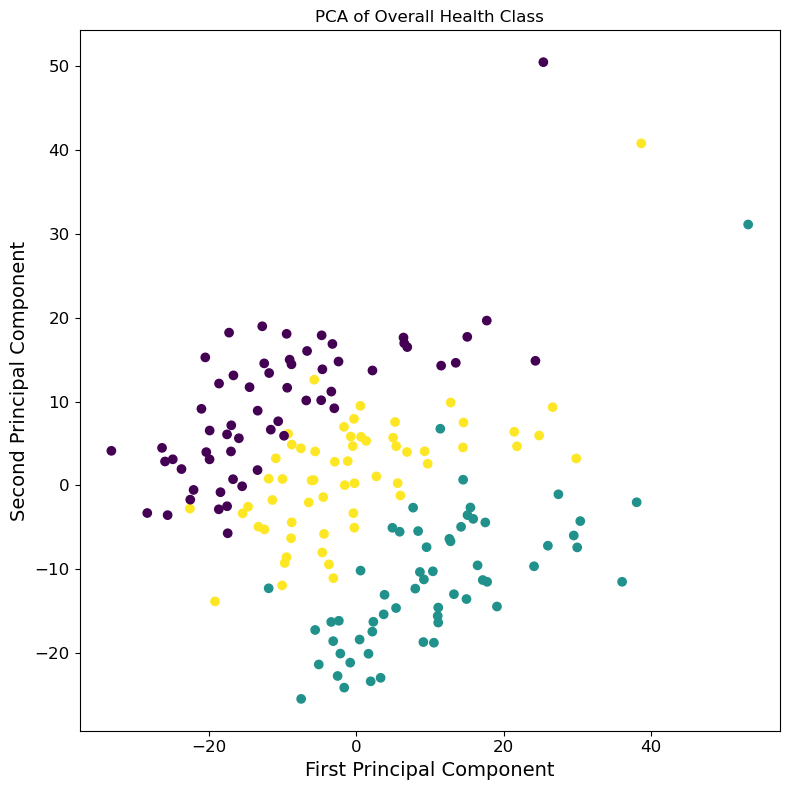

Saving figure pca_plot_Mental Health


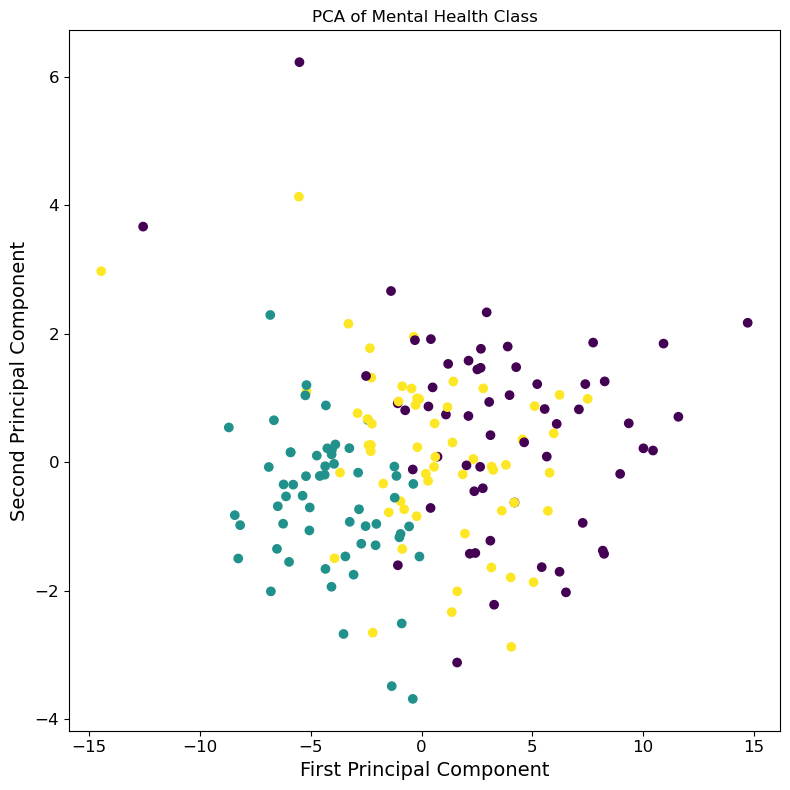

Saving figure pca_plot_Smoking and Alcohol Use


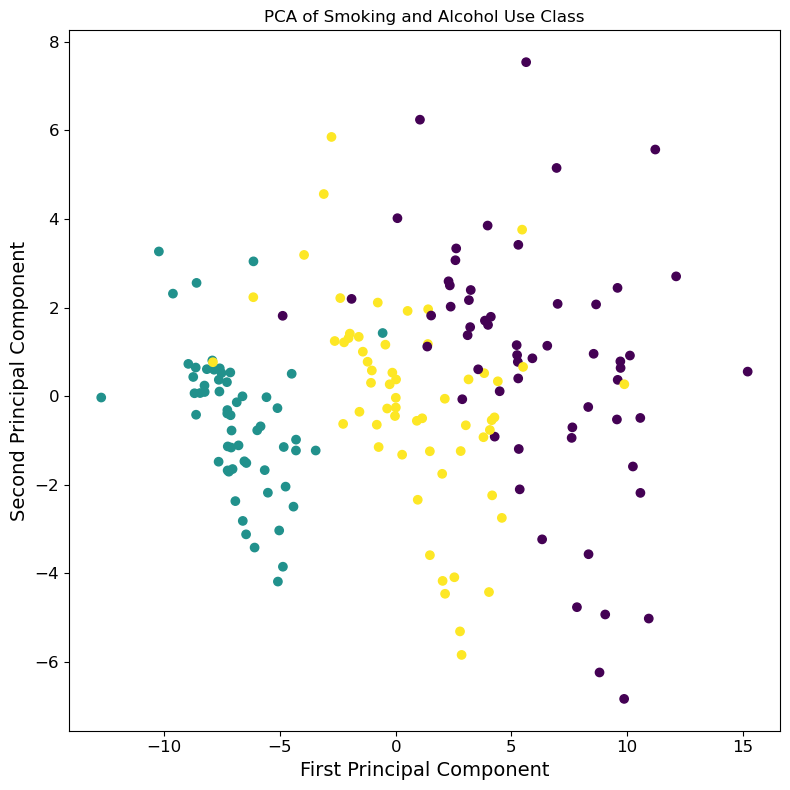

Saving figure pca_plot_Screenings and Vaccines


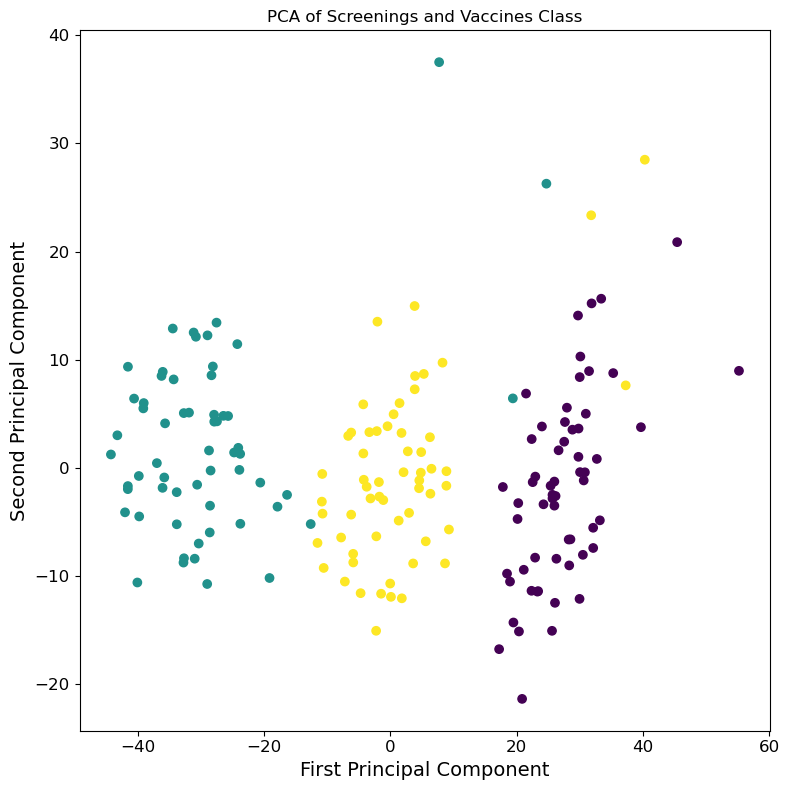

Saving figure pca_plot_Nutrition_Physical Activity_Obesity


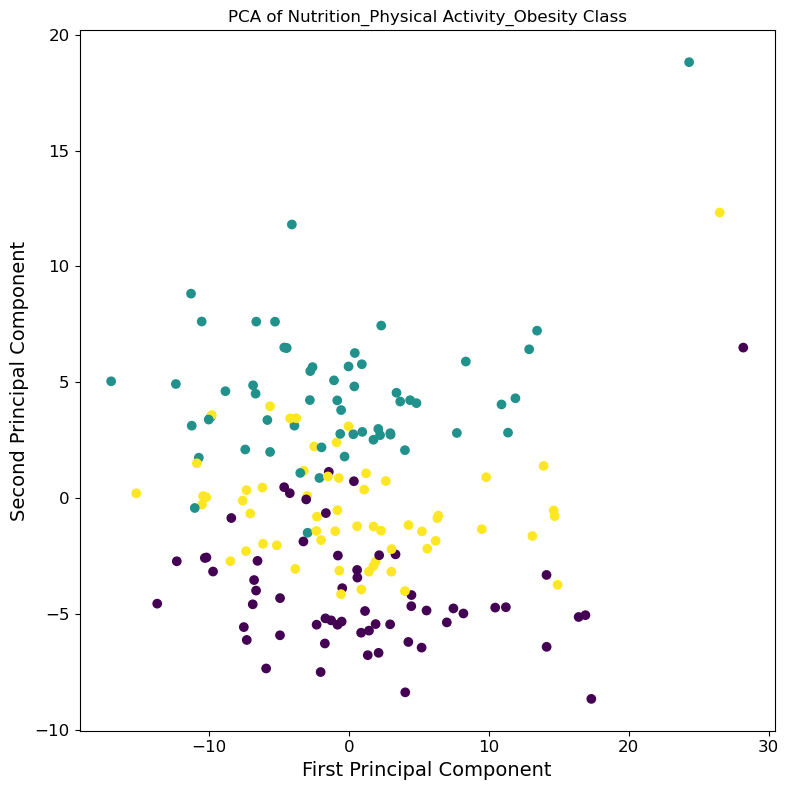

Saving figure pca_plot_Caregiving


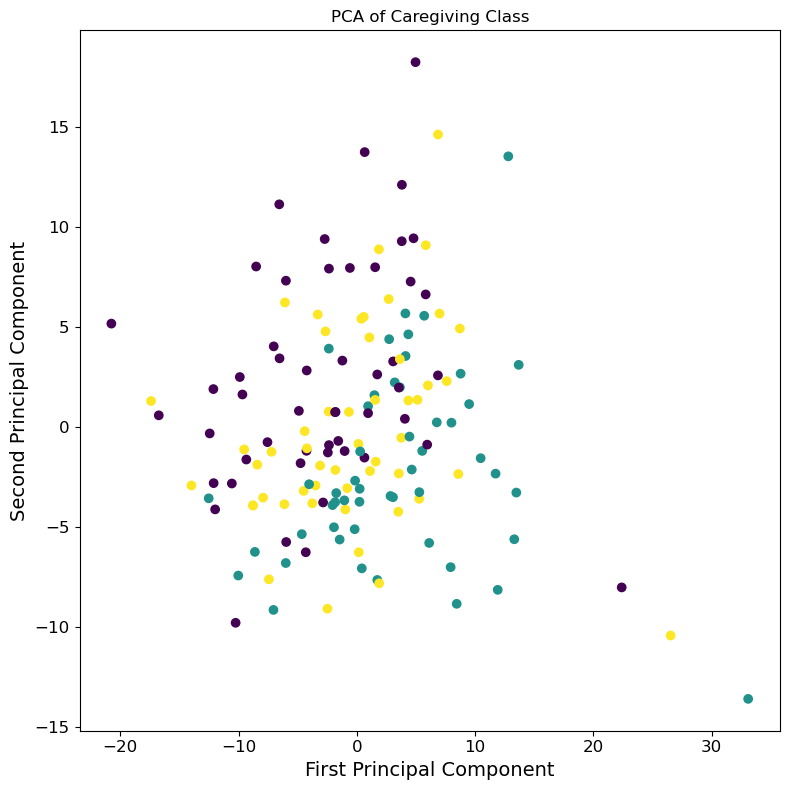

Saving figure pca_plot_Cognitive Decline


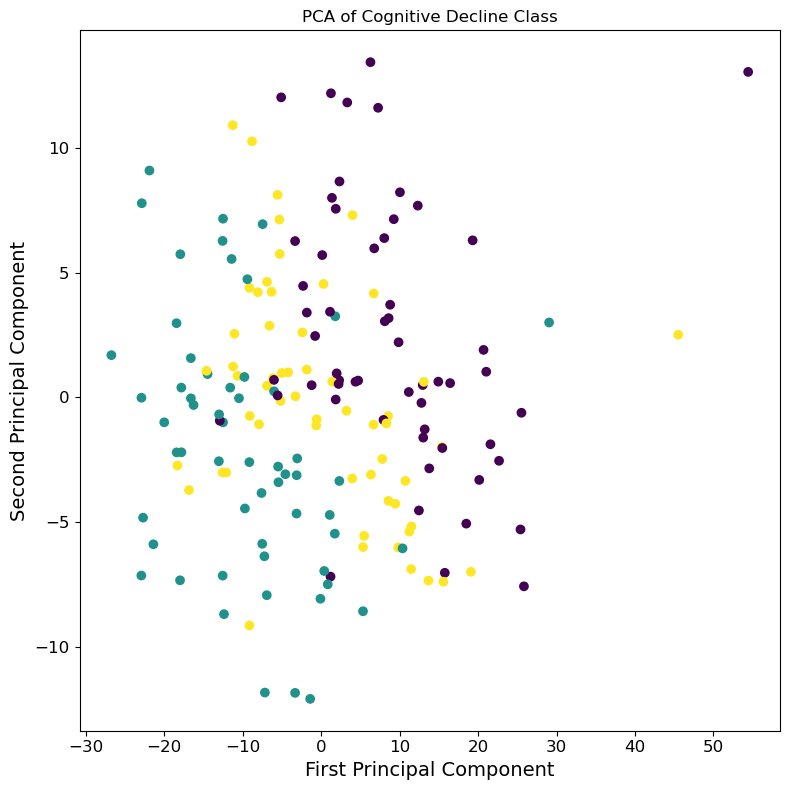

In [126]:
# Dimensionality Reduction for Overall Health Class
attributes = ["Overall Health", "Mental Health", "Smoking and Alcohol Use", "Screenings and Vaccines", "Nutrition_Physical Activity_Obesity", "Caregiving", "Cognitive Decline"]
from sklearn.decomposition import PCA

for i in range(len(encoded_agegroup)):
    pca = PCA(n_components=2)
    pca.fit(alzheimers_dfs[i].iloc[:, 2:]) # all the topics 
    X_pca = pca.transform(alzheimers_dfs[i].iloc[:, 2:])
    X_pca.shape
    # Plot the data for each df in alzheimers_dfs
    plt.figure(figsize=(8, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=encoded_agegroup[i], cmap='viridis')
    plt.title(f'PCA of {attributes[i]} Class')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    save_fig(f"pca_plot_{attributes[i]}")
    plt.show()


In [127]:
file_names = ["Overall_Health", "Mental_Health", "Smoking_and_Alcohol_Use", "Screenings_and_Vaccines", "Nutrition_Physical_Activity_Obesity", "Caregiving", "Cognitive_Decline"]
os.makedirs('dataset/afterpreprocessing', exist_ok=True) 
# export dataframe into a CSV File
for i in range(len(alzheimers_dfs)):
    alzheimers_dfs[i].to_csv(f'dataset/afterpreprocessing/{file_names[i]}.csv', index=False)